Business Questitions:
1. Import Claim_data.csv and cust_data.csv and combined the two datasets appropriately to create 360 view of the data.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as stats

In [2]:
Cust_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Case Study 3 - Insurance Claims Case Study//cust_demographics.csv')
Claim_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Case Study 3 - Insurance Claims Case Study//claims.csv')

In [3]:
Cust_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [4]:
Claim_df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
Cust_claim_df = pd.merge(left=Cust_df,right=Claim_df, left_on='CUST_ID', right_on='customer_id', how='right')

In [6]:
Cust_claim_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [7]:
Cust_claim_df.drop(columns='CUST_ID',inplace=True)

2. Perform the data audit for the data types and find out if there are any mismatch within the current datatypes of the columns and their business         significance.

In [8]:
Cust_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1085 non-null   object 
 1   DateOfBirth          1085 non-null   object 
 2   State                1085 non-null   object 
 3   Contact              1085 non-null   object 
 4   Segment              1085 non-null   object 
 5   claim_id             1100 non-null   int64  
 6   customer_id          1100 non-null   int64  
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [9]:
Cust_claim_df['claim_date'] = pd.to_datetime(Cust_claim_df['claim_date'],errors='coerce')

In [10]:
Cust_claim_df['claim_date'] = pd.to_datetime(Cust_claim_df['claim_date'], format='%d-%m-%y')

In [11]:
Cust_claim_df['DateOfBirth'] = pd.to_datetime(Cust_claim_df['DateOfBirth'],errors='coerce')

In [12]:
Cust_claim_df['DateOfBirth'] = pd.to_datetime(Cust_claim_df['DateOfBirth'],errors='%d-%m-%y')

In [13]:
Cust_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1085 non-null   object        
 1   DateOfBirth          1085 non-null   datetime64[ns]
 2   State                1085 non-null   object        
 3   Contact              1085 non-null   object        
 4   Segment              1085 non-null   object        
 5   claim_id             1100 non-null   int64         
 6   customer_id          1100 non-null   int64         
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   object        
 13  total_policy_claims  1090 non-nul

3. Convert the column claim_amount to numeric. Use the appropriate Modual/attributes to remove the $ sign.

In [14]:
def remvdollor (x):
    if pd.isnull(x):
        return np.nan
    else:
        return x[1:]
Cust_claim_df['claim_amount'] = Cust_claim_df['claim_amount'].apply(remvdollor)
Cust_claim_df['claim_amount'] = Cust_claim_df['claim_amount'].astype('float64')

4. Of all the injuries claims,some of them have gone unreported with the police. create an alert flag (1,0) for all such claims.

In [15]:
Cust_claim_df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


In [16]:
Cust_claim_df['claim_type'].value_counts()

claim_type
Material only          663
Material and injury    241
Injury only            196
Name: count, dtype: int64

In [17]:
Cust_claim_df['alert_flag'] = 0
Cust_claim_df.loc[(Cust_claim_df['police_report'] == 'No') & ((Cust_claim_df['claim_type'] == 'Material and injury')|(Cust_claim_df['claim_type'] == 'Injury only')),['alert_flag']] = 1

In [18]:
Cust_claim_df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. however customer_id should remain unique.
   Retain the most recent observation and delete any duplicated records in the data based on the customer_id column.

In [19]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag'],
      dtype='object')

In [20]:
Cust_claim_df.shape

(1100, 16)

In [21]:
Cust_claim_df.sort_values(by='claim_date',ascending= True, inplace= True, ignore_index= True)

In [22]:
Cust_claim_df.drop_duplicates(subset='customer_id', inplace= True, ignore_index= True)

In [23]:
Cust_claim_df.shape

(1093, 16)

In [24]:
Cust_claim_df['customer_id'].nunique()

1093

6. Check for missing values with an appropriate values.(mean of continuous and mode of categorical).

In [25]:
Cust_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1078 non-null   object        
 1   DateOfBirth          1078 non-null   datetime64[ns]
 2   State                1078 non-null   object        
 3   Contact              1078 non-null   object        
 4   Segment              1078 non-null   object        
 5   claim_id             1093 non-null   int64         
 6   customer_id          1093 non-null   int64         
 7   incident_cause       1093 non-null   object        
 8   claim_date           1093 non-null   datetime64[ns]
 9   claim_area           1093 non-null   object        
 10  police_report        1093 non-null   object        
 11  claim_type           1093 non-null   object        
 12  claim_amount         1028 non-null   float64       
 13  total_policy_claims  1083 non-nul

In [26]:
def miss_imp(x):
    if x.dtypes == 'object':
        return x.fillna(x.mode()[0])
    if x.dtypes == 'datetime64[ns]':
        return x.fillna(x.median())
    else:
        return x.fillna(x.mean())
Cust_claim_df = Cust_claim_df.apply(miss_imp)

In [27]:
Cust_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1093 non-null   object        
 1   DateOfBirth          1093 non-null   datetime64[ns]
 2   State                1093 non-null   object        
 3   Contact              1093 non-null   object        
 4   Segment              1093 non-null   object        
 5   claim_id             1093 non-null   int64         
 6   customer_id          1093 non-null   int64         
 7   incident_cause       1093 non-null   object        
 8   claim_date           1093 non-null   datetime64[ns]
 9   claim_area           1093 non-null   object        
 10  police_report        1093 non-null   object        
 11  claim_type           1093 non-null   object        
 12  claim_amount         1093 non-null   float64       
 13  total_policy_claims  1093 non-nul

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
   (i) Children (< 18) (ii) Youth  (18 - 30) (iii) Adult (30 - 60) (iv) Senior (>60).

In [28]:
Cust_claim_df.loc[Cust_claim_df['DateOfBirth'].dt.year>2020,'DateOfBirth'] = (Cust_claim_df['DateOfBirth'][Cust_claim_df['DateOfBirth'].dt.year>2020] - pd.DateOffset(years=100))

In [29]:
Cust_claim_df['Age'] = ((Cust_claim_df['claim_date'].max() - Cust_claim_df['DateOfBirth']).dt.days)//365.25

In [30]:
Cust_claim_df['Age_type'] = pd.cut(Cust_claim_df['Age'], bins=[0,17,30,60,100], labels=['Child','Youth','Adult','Senior'])

8. What is the average amount claimed by the customers from various segments?

In [31]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type'],
      dtype='object')

In [32]:
Cust_claim_df['Age_type'].value_counts()

Age_type
Adult     739
Youth     354
Child       0
Senior      0
Name: count, dtype: int64

In [33]:
a = Cust_claim_df.pivot_table(index='Segment', values='claim_amount', aggfunc=np.mean)

In [34]:
a.rename(columns={'claim_amount':'Avg_claim_amt'})

,Avg_claim_amt
Segment,
Gold,12675.249640
Platinum,12368.224114
Silver,12266.636772


9. What is the total claim amount based on incident cause for all the claims that have been done atleast 20 days prior to 1st Oct,2018?

In [35]:
a = dt.datetime(day = 1, month = 10, year = 2018) - dt.timedelta(days=20)

In [36]:
a

datetime.datetime(2018, 9, 11, 0, 0)

In [37]:
Cust_claim_df.loc[Cust_claim_df['claim_date']<a,:].groupby(by='incident_cause')[['claim_amount']].sum().round(2)

,claim_amount
incident_cause,
Crime,729484.47
Driver error,3292983.92
Natural causes,1314781.94
Other causes,3779914.38
Other driver error,3384075.92


10. How many adults from TX,DE & AK claimed insurance for driver realeted issues and causes?

In [38]:
Cust_claim_df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_type
0,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1,42.0,Adult
1,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,43.0,Adult


In [39]:
Cust_claim_df['incident_cause'].value_counts()

incident_cause
Other causes          289
Driver error          257
Other driver error    249
Natural causes        188
Crime                 110
Name: count, dtype: int64

In [40]:
Cust_claim_df.loc[(Cust_claim_df['Age_type'] == 'Adult') & (Cust_claim_df['State'].isin(['TX','DE','AK'])) & ((Cust_claim_df['incident_cause']=='Driver error')|(Cust_claim_df['incident_cause'] == 'Other driver error')),:].shape[0]

24

11. Draw a pie chart between the aggregated value of claim amount based on gender and segment?

In [41]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type'],
      dtype='object')

In [42]:
b = Cust_claim_df.groupby(by=['gender','Segment'])[['claim_amount']].sum().round(2)

In [43]:

b

claim_amount
gender Segment               
Female Gold        2109529.44
       Platinum    2369321.46
       Silver      1897980.42
Male   Gold        2783116.92
       Platinum    2095607.45
       Silver      2346275.91

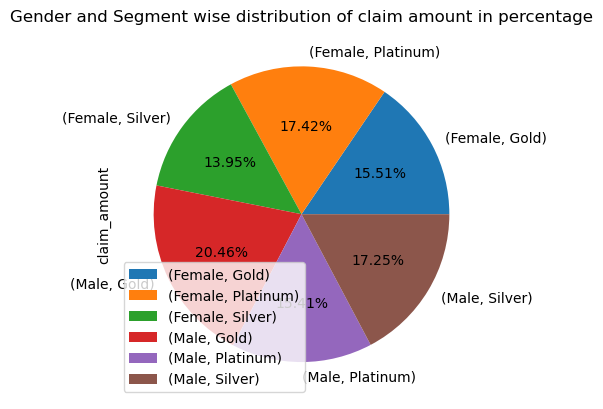

In [44]:
b.plot(kind = 'pie', y = 'claim_amount',autopct = '%0.2f%%')
plt.title('Gender and Segment wise distribution of claim amount in percentage')
plt.show()

12. Among male and female , which gender had claimed the most for any type of driver related issues.(i.e. the matric can be compared using a bar chart)

In [45]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type'],
      dtype='object')

In [46]:
Cust_claim_df['incident_cause'].value_counts()

incident_cause
Other causes          289
Driver error          257
Other driver error    249
Natural causes        188
Crime                 110
Name: count, dtype: int64

In [47]:
Cust_claim_df['driver_flag'] = 'Non-driver'
Cust_claim_df.loc[((Cust_claim_df['incident_cause'] == 'Driver error')|(Cust_claim_df['incident_cause'] == 'Other driver error')),['driver_flag']] = 'driver related'

In [48]:
Cust_claim_df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_type,driver_flag
0,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1,42.0,Adult,Non-driver
1,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,43.0,Adult,driver related


In [49]:
c=Cust_claim_df.pivot_table(index='gender', columns='driver_flag' , aggfunc= {'driver_flag':'count'})

In [50]:
c

driver_flag               
driver_flag  Non-driver driver related
gender                                
Female              306            221
Male                281            285

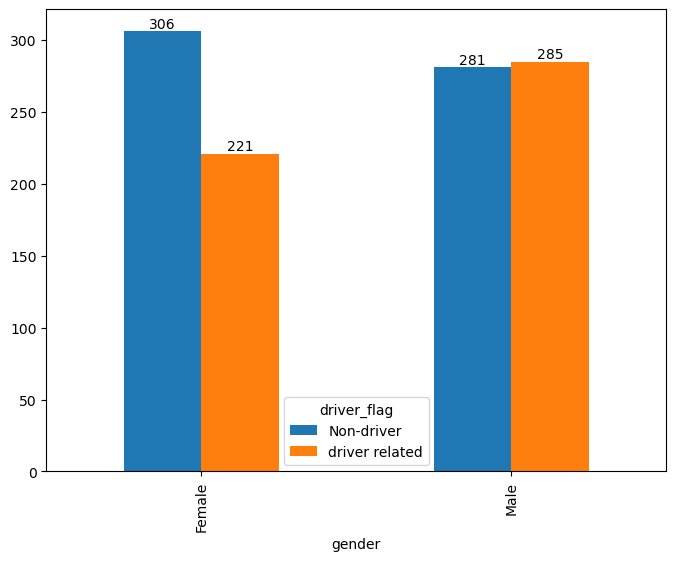

In [51]:
d = c['driver_flag']
e = d.plot(kind = 'bar', figsize = (8,6))
for i in e.containers:
    e.bar_label(i)
plt.show()

13. Which age group had the max. fraudulent policy claims?

In [52]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag'],
      dtype='object')

In [53]:
d= Cust_claim_df.pivot_table(index='Age_type' , columns= 'fraudulent' , values= 'total_policy_claims', aggfunc=np.sum).round(0)

In [54]:
d

fraudulent,No,Yes
Age_type,,
Child,0.0,0.0
Youth,419.0,153.0
Adult,871.0,292.0
Senior,0.0,0.0


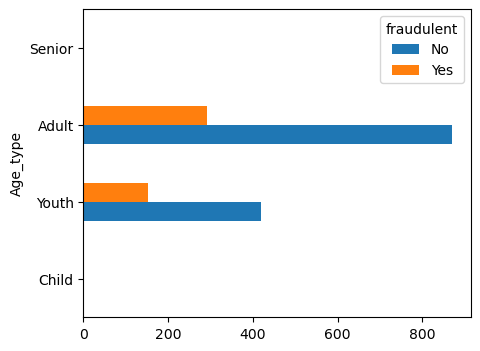

In [55]:
d.plot(kind = 'barh' , figsize = (5,4))
plt.show()

14. Visualize the monthly trend of the total amount that has been claimed by the customers.
    Ensure that on the "Month" axis, the month is in chronological order not alphabetical order.

In [56]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag'],
      dtype='object')

In [57]:
Cust_claim_df['Claim_year_month'] = pd.to_datetime(Cust_claim_df['claim_date']).dt.strftime("%b'%y")

In [58]:
Cust_claim_df.head(4)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_type,driver_flag,Claim_year_month
0,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1,42.0,Adult,Non-driver,Jan'17
1,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,43.0,Adult,driver related,Jan'17
2,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,1,19.0,Youth,Non-driver,Jan'17
3,Male,1969-06-08,FL,641-684-7986,Platinum,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,1,49.0,Adult,driver related,Jan'17


In [59]:
monthly_claims = Cust_claim_df.groupby('Claim_year_month')['claim_amount'].sum().sort_index()

In [60]:
monthly_claims.index = pd.to_datetime(monthly_claims.index, format="%b'%y")

In [61]:
monthly_claims = monthly_claims.sort_index()

In [62]:
monthly_claims

Claim_year_month
2017-01-01    610224.481031
2017-02-01    633471.987354
2017-03-01    617171.987354
2017-04-01    749358.493677
2017-05-01    547599.981031
2017-06-01    599830.493677
2017-07-01    790639.974708
2017-08-01    433790.487354
2017-09-01    459068.455739
2017-10-01    650470.481031
2017-11-01    625922.987354
2017-12-01    725685.493677
2018-01-01    721605.474708
2018-02-01    523105.987354
2018-03-01    731141.981031
2018-04-01    528100.993677
2018-05-01    567433.468385
2018-06-01    716215.968385
2018-07-01    591850.968385
2018-08-01    479623.493677
2018-09-01    521319.481031
2018-10-01    778198.468385
Name: claim_amount, dtype: float64

In [63]:
monthly_claims.index  = monthly_claims.index.strftime("%b'%y")

In [64]:
monthly_claims

Claim_year_month
Jan'17    610224.481031
Feb'17    633471.987354
Mar'17    617171.987354
Apr'17    749358.493677
May'17    547599.981031
Jun'17    599830.493677
Jul'17    790639.974708
Aug'17    433790.487354
Sep'17    459068.455739
Oct'17    650470.481031
Nov'17    625922.987354
Dec'17    725685.493677
Jan'18    721605.474708
Feb'18    523105.987354
Mar'18    731141.981031
Apr'18    528100.993677
May'18    567433.468385
Jun'18    716215.968385
Jul'18    591850.968385
Aug'18    479623.493677
Sep'18    521319.481031
Oct'18    778198.468385
Name: claim_amount, dtype: float64

In [65]:
monthly_claims.reset_index().head(2)

,Claim_year_month,claim_amount
0,Jan'17,610224.481031
1,Feb'17,633471.987354


In [66]:
monthly_claims = monthly_claims.reset_index()
print(monthly_claims.columns)
monthly_claims['Claim_year_month'] = monthly_claims["Claim_year_month"].astype(str)

Index(['Claim_year_month', 'claim_amount'], dtype='object')


In [67]:
monthly_claims.head(2)

,Claim_year_month,claim_amount
0,Jan'17,610224.481031
1,Feb'17,633471.987354


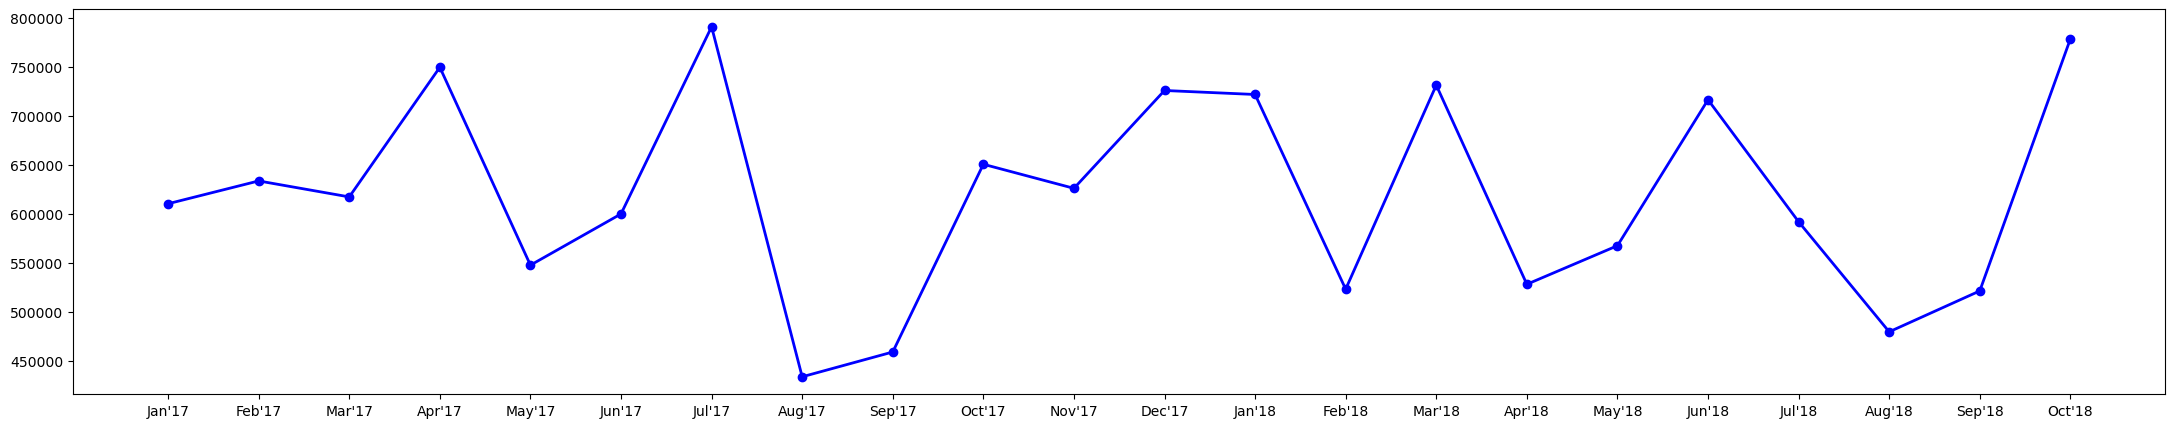

In [68]:
plt.figure(figsize=(27, 5))
plt.plot(monthly_claims["Claim_year_month"], monthly_claims["claim_amount"], marker="o", linestyle="-", color="b", linewidth=2, markersize=6, label="Claim Amount")
plt.show()

15. What is the average claim amount for gender and age categories and suitably represent the above using facetted bar chart, one facet that represents fraudlent claims and the other for non fraudulent claims.

In [69]:
Cust_claim_df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_type,driver_flag,Claim_year_month
0,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1,42.0,Adult,Non-driver,Jan'17
1,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,43.0,Adult,driver related,Jan'17


In [70]:
Cust_claim_df.pivot_table(index=['gender','Age_type'], columns='fraudulent', values='claim_amount', aggfunc=np.sum).round(2)

fraudulent               No         Yes
gender Age_type                        
Female Child           0.00        0.00
       Youth     1613742.47   285908.97
       Adult     3368192.91  1108986.97
       Senior          0.00        0.00
Male   Child           0.00        0.00
       Youth     1727524.94   479531.48
       Adult     3601885.38  1416058.47
       Senior          0.00        0.00

In [71]:
Avg_claim_df = Cust_claim_df.groupby(by=['gender','Age_type','fraudulent'])[['claim_amount']].mean().reset_index()

In [72]:
Avg_claim_df.head(2)

,gender,Age_type,fraudulent,claim_amount
0,Female,Child,No,NaN
1,Female,Child,Yes,NaN


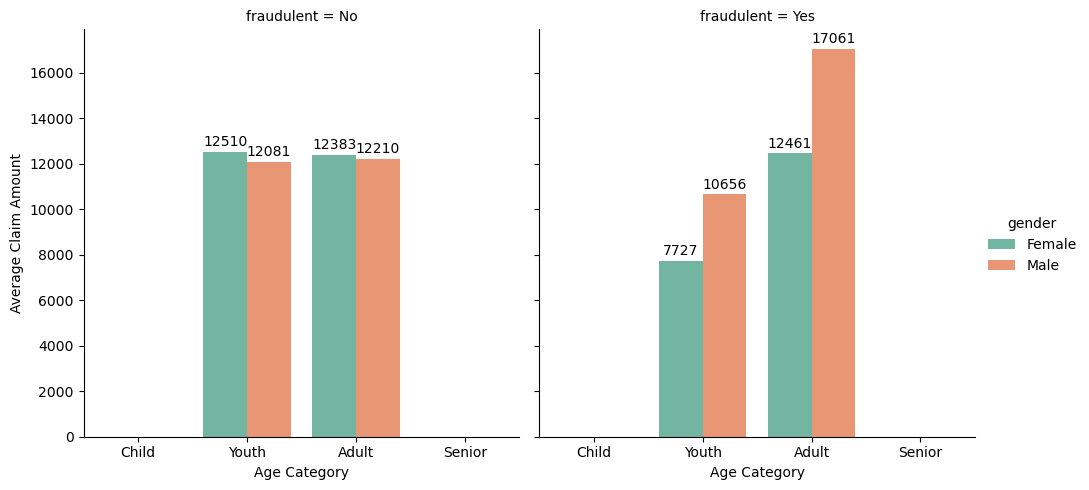

In [73]:
e = sns.catplot(data=Avg_claim_df, kind='bar', x='Age_type', y='claim_amount', hue='gender', col='fraudulent', palette='Set2', height=5, aspect=1)
e.set_axis_labels("Age Category", "Average Claim Amount")
for ax in e.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.show()

Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements.

16. Is there any similarity in the amount claimed by males and females?

male and female are independent group we use ttest independent

null hypothesis h0 - u1 = u2
                ha - u1 <> u2
     confidence interval = 95%
     p value = 0.05

In [74]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag',
       'Claim_year_month'],
      dtype='object')

In [75]:
Male_claims = Cust_claim_df[Cust_claim_df['gender'] == 'Male']['claim_amount']

In [76]:
Female_claims = Cust_claim_df[Cust_claim_df['gender'] =='Female']['claim_amount']

Perform independent ttest

In [77]:
t_stat,p_value = stats.ttest_ind(Male_claims,Female_claims, equal_var= False)

In [78]:
t_stat,p_value

(0.8230533193483074, 0.4106578395333297)

In [79]:
if p_value < 0.05:
    print("Significant difference in claim_amounts between male & Female.")
else:
    print("No significant difference in claim amount between Male and Female.")

No significant difference in claim amount between Male and Female.


In [80]:
Male_claims.mean()

12765.018149069861

In [81]:
Female_claims.mean()

12100.249177674083

17. Is there any relationship between age_type and segment?

Since both are categorical variables we use chi-square test to find out relationship between age_type and segment.

Null Hypothesis = H0 = No Relationship between age_type and Segment.
Alternate Hypothesis = H1 = Relationship between age_type and Segment.

Contingency Tables are commonly used for chi-square test of independance.

In [82]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag',
       'Claim_year_month'],
      dtype='object')

In [83]:
contingency_table = pd.crosstab(Cust_claim_df['Age_type'], Cust_claim_df['Segment'])

In [84]:
contingency_table

Segment,Gold,Platinum,Silver
Age_type,,,
Youth,126,120,108
Adult,260,241,238


In [85]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.3491851180924322, pvalue=0.8397991196262199, dof=2, expected_freq=array([[125.01738335, 116.92040256, 112.06221409],
       [260.98261665, 244.07959744, 233.93778591]]))

Since we fail to reject null hypothesis h0.
Conclusion - No Relationship between age_type and Segment.

In [86]:
if p_value < 0.05:
    print("Significant relationship between Age_type & Segment.")
else:
    print("No Significant relationship between Age_type & Segment")

No Significant relationship between Age_type & Segment


18. The Current year has shown a significant rise in claim_amount as compared to fiscal year 2016-17.

In [87]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag',
       'Claim_year_month'],
      dtype='object')

In [88]:
Current_year = Cust_claim_df['claim_amount'][(Cust_claim_df['claim_date']>'2018-04-01')]

In [89]:
Previous_year = Cust_claim_df['claim_amount'][(Cust_claim_df['claim_date']<'2018-04-01')]

In [90]:
Current_year.mean()

12194.585544973967

In [91]:
Previous_year.mean()

12558.784996108949

In [92]:
t_stat, p_value  = stats.ttest_ind(Current_year,Previous_year, equal_var=False)

In [93]:
t_stat, p_value

(-0.4228696929305141, 0.6725237751218317)

In [94]:
if p_value < 0.05:
    print("Significant rise in Current year claim_amount as compared to fiscal year 2016-17.")
else:
    print("No Significant rise in Current year claim_amount as compared to fiscal year 2016-17.")

No Significant rise in Current year claim_amount as compared to fiscal year 2016-17.


19. Is there any relation between Age_type and insurance claims?

null hypothesis = h0 = "No relationship between Age_type and insurance claim."
alternate hypothesis = h1 = "relationship between Age_type and insurance claim."

In [95]:
Adult  = Cust_claim_df['total_policy_claims'][Cust_claim_df['Age_type'] == 'Adult']
Youth = Cust_claim_df['total_policy_claims'][Cust_claim_df['Age_type'] =='Youth']

In [96]:
contingency_table = pd.crosstab(Cust_claim_df['Age_type'], Cust_claim_df['total_policy_claims'])

In [97]:
contingency_table

total_policy_claims,1.000000,1.587258,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age_type,,,,,,,,,
Youth,260,3,29,25,20,11,4,1,1
Adult,529,7,77,64,40,16,5,1,0


In [98]:
chi2_stat, p_value, dof, excepted = stats.chi2_contingency(contingency_table)

In [99]:
chi2_stat, p_value, dof, excepted

(5.969389283512504,
 0.6506608841704065,
 8,
 array([[2.55540714e+02, 3.23879231e+00, 3.43311985e+01, 2.88252516e+01,
         1.94327539e+01, 8.74473925e+00, 2.91491308e+00, 6.47758463e-01,
         3.23879231e-01],
        [5.33459286e+02, 6.76120769e+00, 7.16688015e+01, 6.01747484e+01,
         4.05672461e+01, 1.82552608e+01, 6.08508692e+00, 1.35224154e+00,
         6.76120769e-01]]))

In [100]:
if p_value < 0.05:
    print("There is a significant relationship between age group and insurance claims.")
else:
    print("No significant relationship between age group and insurance claims.")

No significant relationship between age group and insurance claims.


20. Is there any relationship between total number of policy claims and the claimed amount?

In [101]:
Cust_claim_df.columns

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'claim_id',
       'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_type', 'driver_flag',
       'Claim_year_month'],
      dtype='object')

In [102]:
Cust_claim_df[['total_policy_claims','claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.016401
claim_amount,-0.016401,1.000000


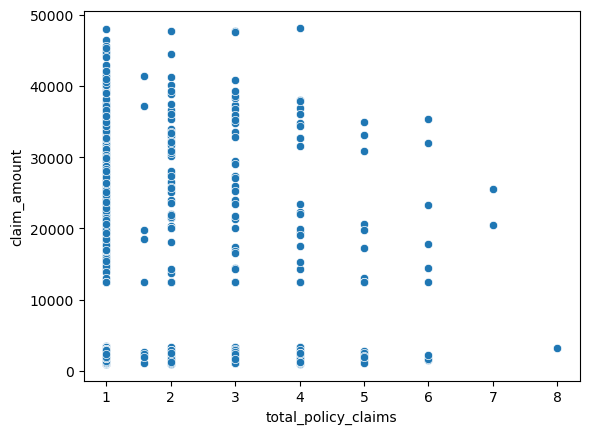

In [103]:
sns.scatterplot(data=Cust_claim_df, x='total_policy_claims', y='claim_amount')
plt.show()

In [104]:
# There is No relation between Total Policy Claim & Claim Aount.